In this notebook we will discuss Image Processing and how to use Scipy in this regard

We will look into the following topics:

1) Filtering

2) Edge Detection

3) Thresholding

4) Segmentation

5) Enhancement

What is an image?

Image a 2-dimensional representation of a visual representation. Pixel is a basic unit of an image which represents intensity.

Most popular file formats for an image are jpeg format or png.

In a black and white image, there are only two pixel intensities: 0 or 1. A black and white image is a 2D image. 

In a gray-scale image, the intensities range from 0 to 255. A gray-scale image is a 2D image.

In a color image, we have there different dimensionals that represent the Red, Blue and Green intensities respectively. Each dimension varies from 0 to 255. A color image is a 3D image. 

#### Histogram

Histogram of an image represents the frequencies of the intensities that occur in an image.

Reference: https://answers.unity.com/questions/442699/need-help-with-a-simple-histogram.html
        
<img src="images/histogram_example.jpg">

In [2]:
%matplotlib inline

In [2]:
!pip install opencv-contrib-python

In [3]:
import numpy as np
import scipy.ndimage
import imageio
#from scipy.misc.pilutil import Image
import matplotlib.pyplot as plt
import cv2 # opencv
import scipy.misc

#### Filtering

Filtering is used to obtain relevant information from an image.

Different filters are:
    
    1) mean filter is used to smooth an image
    
    2) median filter is used to remove salt and pepper noise
    
    3) maximum filter is used to remove low intensity outliers
    

(768, 1024) <class 'numpy.ndarray'>
(768, 1024)


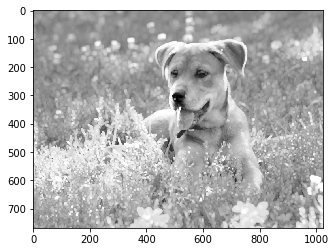

In [4]:
# maximum filter

img = cv2.imread("images/dog.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape, type(img_gray))
amax = scipy.ndimage.maximum_filter(img_gray, size=5, footprint=None,
                                    output=None, mode="reflect",
                                    cval=0.0, origin=0) # Increasing 'size' will blur image

print(amax.shape)
plt.imshow(amax, cmap="gray")

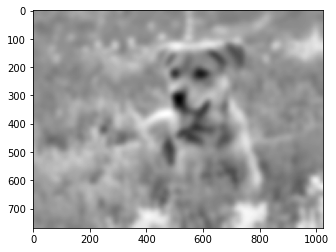

In [6]:
# inducing blurring

face = cv2.imread("images/dog.png")

face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

blurred_face = scipy.ndimage.gaussian_filter(face_gray, sigma=10)

plt.imshow(blurred_face, cmap="gray")

(256, 384, 3)


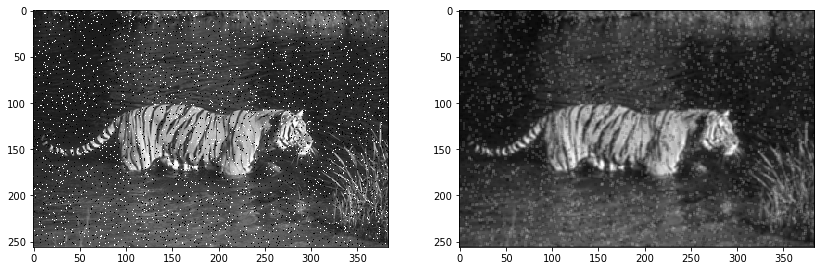

In [6]:
# mean filter to reduce noise
face = cv2.imread("images/tiger_noise.png")
print(face.shape)
face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
k = np.ones((3,3))/9
bconvolve = scipy.ndimage.convolve(face_gray, k, mode="constant", cval=0.0)

plt.figure(1, figsize=(14, 10))

plt.subplot(221)
plt.imshow(face_gray, cmap="gray")

plt.subplot(222)
plt.imshow(bconvolve, cmap="gray")
plt.show()

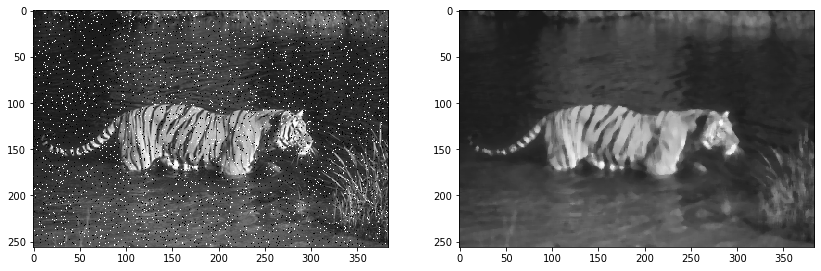

In [7]:
# median filter

# Reference for the image: http://www.fit.vutbr.cz/~vasicek/imagedb/

face = cv2.imread("images/tiger_noise.png")
face_medium = scipy.ndimage.median_filter(face, 5) # median filters remove the top and low outliers

plt.figure(1, figsize=(14, 10))
plt.subplot(221)
plt.imshow(face, cmap="gray")

plt.subplot(222)
plt.imshow(face_medium, cmap="gray")
plt.show()

#### Affine Transformations

Affine transformations such as rotation and  translation are used to produce more images from a sample of less images. These are extremely popular in machine learning when there is a mismatch between several categories.

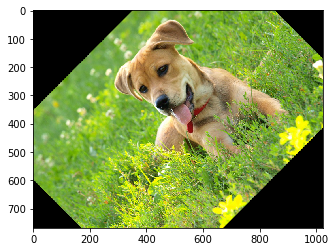

In [8]:
# rotation
import skimage.transform

face = imageio.imread("images/dog.png")

# convolutional neural network - CNN
# ML algorithm

rotate_face = skimage.transform.rotate(face, 45)

import matplotlib.pyplot as plt
plt.imshow(rotate_face)
plt.show()

(768, 1024, 3)


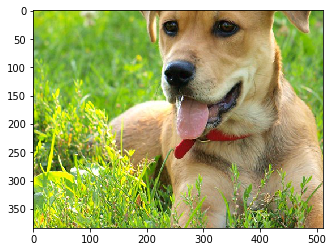

In [9]:
# cropping

face = imageio.imread("images/dog.png")
print(face.shape)
lx, ly, lz = face.shape
# Cropping
crop_face = face[int(lx/4): -int(lx/4), int(ly/4): -int(ly/4)]
import matplotlib.pyplot as plt
plt.imshow(crop_face)
plt.show()

#### Edge Detection

Edge are places in an image that have strong intensity contrast. Let us consider an example:
    
<img src="images/edge1.jpg">

There are several edge detection filters, we will consider Soble. 

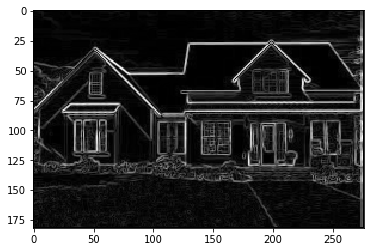

In [10]:
# edge detection using sobel

from skimage.filters import sobel
house = cv2.imread("images/house_simple.jpg")
house_gray = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)

house_sobel = sobel(house_gray)

plt.imshow(house_sobel, cmap="gray")
plt.show()

#### Segmentation

Is a technique to classify an image into its objects.

Reference: https://www.ntu.edu.sg/home/asjfcai/Benchmark_Website/benchmark_index.html
        
<img src="images/segmentation1.png" width=400, height=300>

We will look at histogram based segmentation techniques such as Otsu's and Adaptive. To impelement these methods we need to understand thresholding.

Thresholding is a process in which a particular intensity is chosen to threshold the image. All the intensities that are higher than the threshold value will be retained and all the values that are lower than the threshold value will be set to 0.

#### Otsu's Thresholding

Otsu's thresholding was conceptualized by Nobuyuki Otsu. Otsu's method uses a single value to threshold the image.

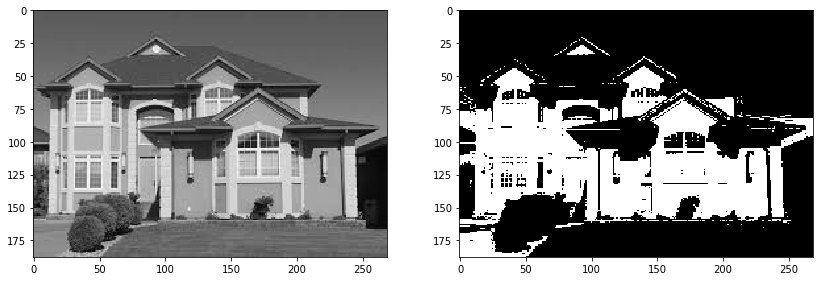

In [11]:
# Otsu's thresholding

from skimage.filters import threshold_otsu

img = cv2.imread("images/house.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh = threshold_otsu(img_gray)
binary = img_gray > thresh

plt.figure(1, figsize=(14, 10))

plt.subplot(221)
plt.imshow(img_gray, cmap="gray")

plt.subplot(222)
plt.imshow(binary, cmap="gray")
plt.show()

132


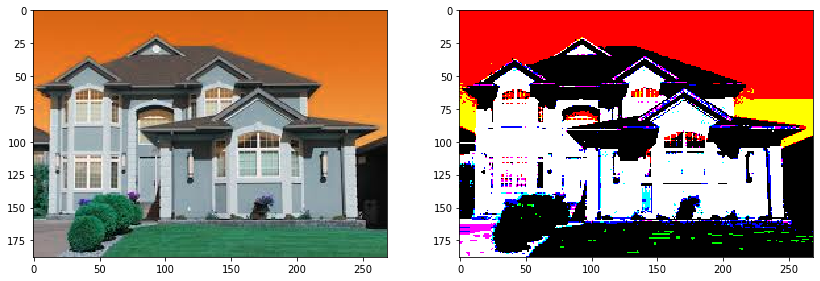

In [19]:
from skimage.filters import threshold_otsu

img = cv2.imread("images/house.jpg")
#img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thresh1 = threshold_otsu(img[:,:,0])
thresh2 = threshold_otsu(img[:,:,1])
thresh3 = threshold_otsu(img[:,:,2])
binary = np.zeros(img.shape)
binary[:,:,0] = img[:,:,0] > thresh1
binary[:,:,1] = img[:,:,1] > thresh2
binary[:,:,2] = img[:,:,2] > thresh3

'''
binary = np.stack([img[:,:,0] > thresh1, 
                    img[:,:,1] > thresh2,
                    img[:,:,2] > thresh3
                   ])
'''
print(thresh)
plt.figure(1, figsize=(14, 10))

plt.subplot(221)
plt.imshow(img, cmap="gray")

plt.subplot(222)
plt.imshow(binary, cmap="gray")
plt.show()

In [12]:
"""
In-class activity: Use the image coins.png from this class notes folder and perform segmentation using Otsu's method.
Use subplot to plot the input and output. Also, save the output in the same folder and call it coins_otsu.png. 
"""

"\nIn-class activity: Use the image coins.png from this class notes folder and perform segmentation using Otsu's method.\nUse subplot to plot the input and output. Also, save the output in the same folder and call it coins_otsu.png. \n"

#### Adaptive Thresholding

In adaptive thresholding the image is divided into sub-images. For each sub-image an average ic computed and 
pixel that are above the threshold value of thast sub-image will be considered and the rest are assigned 0.  

(300, 300)


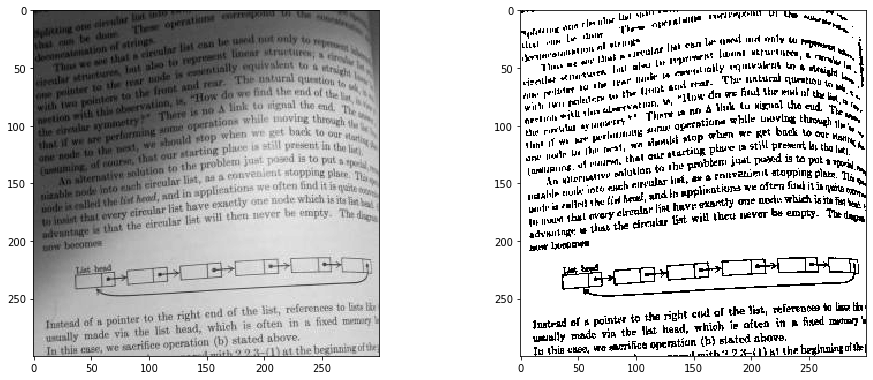

In [13]:
# Adaptive thresholding

# Image Reference: https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-2-adaptive-thresholding/

import skimage
from skimage.filters import threshold_local

from PIL import Image
img = cv2.imread('images/adaptive2.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)

block_size = 35
paper_adaptive = threshold_local(img_gray, block_size, offset=10)
adaptive_binary = img_gray > paper_adaptive

plt.figure(1, figsize=(16, 14))

plt.subplot(221)
plt.imshow(img_gray, cmap="gray")

plt.subplot(222)
plt.imshow(adaptive_binary, cmap="gray")
plt.show()

In [14]:
"""
In-class activity: Retype the above adpative thresholding code and try the following:
1) Use block_size= 5

2) Use block_size=51

For each part, use subplot to plot the input and output.
"""

'\nIn-class activity: Retype the above adpative thresholding code and try the following:\n1) Use block_size= 5\n\n2) Use block_size=51\n\nFor each part, use subplot to plot the input and output.\n'

#### Image Enhancement

Image enhancement is used to increase the contrast in an image.

Reference: https://craftofcoding.wordpress.com/tag/image-enhancement/

<img src="enhancement1.jpg", width=500, height=300>

Here we will consider:
    
    1) Image inverse

    2) Histogram equalization
    
    3) Power law transformation

Image inverse is a linear transformation in which dark intensities will get mapped to bright intensities and vice-versa.

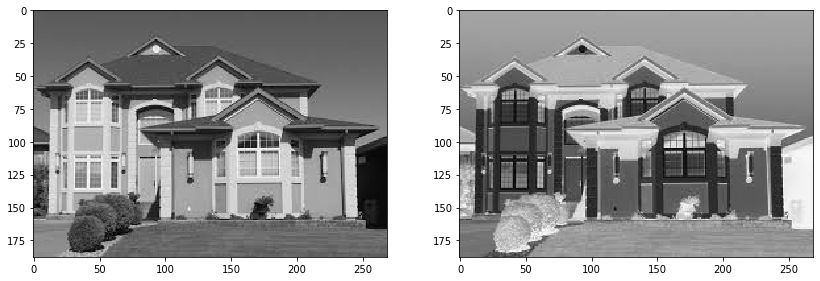

In [15]:
# Image Inverse 


house = cv2.imread("images/house.jpg")
house_gray = cv2.cvtColor(house, cv2.COLOR_BGR2GRAY)
house_inverse = 255 - house_gray


plt.figure(1, figsize=(14, 10))

plt.subplot(221)
plt.imshow(house_gray, cmap="gray")

plt.subplot(222)
plt.imshow(house_inverse, cmap="gray")
plt.show()

#### Power- law transformation

For a give $I(i, j)$ the power low transformation is given by

$t(i, j) = k I(i, j)^\gamma $

where $k$ and $\gamma$ are positive numbers.

If $\gamma < 1$ then low intensities  will get mapped to high intensities. And if $\gamma < 1$ then high intensities will get mapped to low intensities.

<img src="power_law1.png", width=500, weight=300>


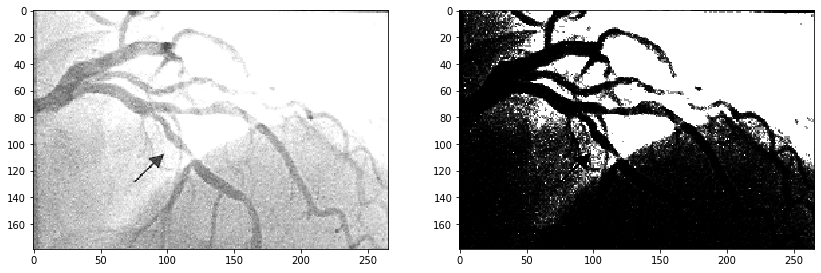

In [16]:
# Power law transformation

im = cv2.imread("images/angiogram1.png")
#im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = im


im_gray = im_gray/255.0
im_power = cv2.pow(im_gray, 20)

plt.figure(1, figsize=(14, 10))
plt.subplot(221)
plt.imshow(im_gray, cmap="gray")

plt.subplot(222)
plt.imshow(im_power, cmap="gray")
plt.show()

In [17]:
"""
In-class activity: Retype the above power law code and perform the following:
1) when gamma is 0.05

2) when gamma is 20

For each part, use subplot to plot the input and output.
"""

'\nIn-class activity: Retype the above power law code and perform the following:\n1) when gamma is 0.05\n\n2) when gamma is 20\n\nFor each part, use subplot to plot the input and output.\n'